In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Đọc dữ liệu từ file CSV
df = pd.read_csv('requests2.csv', usecols=lambda column: column != 'Response Time', encoding='ISO-8859-1')

# Chuyển Timestamp sang datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y/%m/%d - %H:%M:%S')


# # Kiểm tra lại dữ liệu
# df.head()

In [22]:
print("Tổng số lượng requests tới server: \n", df.count())

Tổng số lượng requests tới server: 
 Timestamp            11874
Status               11874
Client IP            11874
Method               11874
Endpoint             11874
Response Time (s)    11874
dtype: int64


In [23]:
print("Số lượng các Method: ", df["Method"].nunique())
print(df["Method"].unique())

Số lượng các Method:  3
['GET' 'POST' 'HEAD']


In [24]:
print("Số lượng các API Endpoint: ", df["Endpoint"].nunique())
print(df["Endpoint"].unique())

Số lượng các API Endpoint:  9
['/api/tags' '/api/version' '/api/chat' '/api/show' '/api/generate'
 '/api/embed' '/' '/favicon.ico' '/api/ps']


In [25]:
response_stats = df['Response Time (s)'].describe()

print("Các chỉ số thống kê về Response Time:")
print(response_stats)


Các chỉ số thống kê về Response Time:
count    11874.000000
mean         4.978870
std         16.542817
min          0.000004
25%          0.215907
50%          0.675397
75%          2.177234
max        647.000000
Name: Response Time (s), dtype: float64


In [26]:
slowest_requests = df.loc[df['Response Time (s)'] == df['Response Time (s)'].max()]

print("Lệnh có thời gian phản hồi chậm nhất:")
print(slowest_requests)

slowest_requests_10 = df.sort_values(by='Response Time (s)', ascending=False).head(10)

print("Các lệnh có thời gian phản hồi chậm nhất:")
print(slowest_requests_10)



Lệnh có thời gian phản hồi chậm nhất:
               Timestamp  Status    Client IP Method   Endpoint  \
6919 2025-02-20 07:24:35     200  192.168.0.1   POST  /api/chat   

      Response Time (s)  
6919              647.0  
Các lệnh có thời gian phản hồi chậm nhất:
                Timestamp  Status      Client IP Method       Endpoint  \
6919  2025-02-20 07:24:35     200    192.168.0.1   POST      /api/chat   
6920  2025-02-20 07:24:37     499  172.16.21.175   POST  /api/generate   
6921  2025-02-20 07:24:46     200  172.16.21.175   POST  /api/generate   
8039  2025-02-20 10:03:58     200  172.16.25.113   POST  /api/generate   
9773  2025-02-21 07:57:38     200  172.16.34.127   POST      /api/chat   
1011  2025-02-19 03:28:08     200    192.168.0.1   POST      /api/chat   
10470 2025-02-21 10:06:14     200    10.61.97.94   POST  /api/generate   
8401  2025-02-21 02:00:21     200    192.168.0.1   POST      /api/chat   
8036  2025-02-20 10:03:11     200  172.16.25.113   POST  /api/gener

/tmp/ipykernel_7905/2499766760.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['Second'] = df['Timestamp'].dt.floor('S')


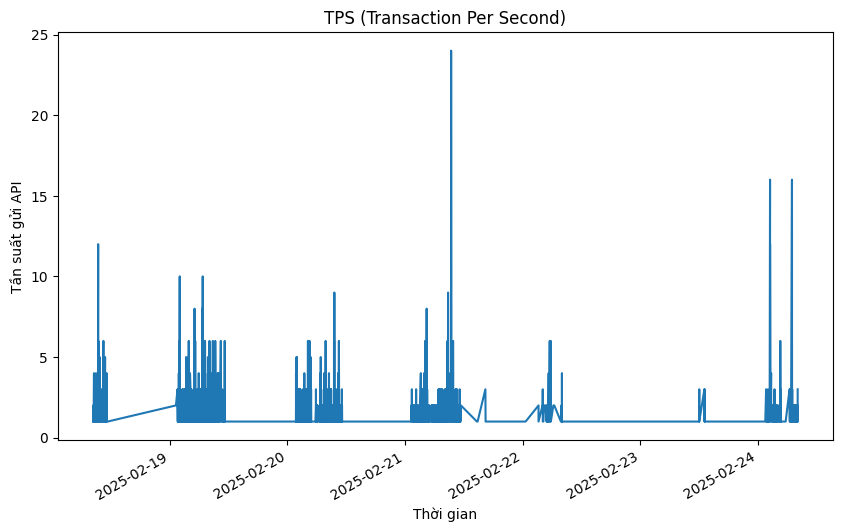

In [27]:
# Thêm cột 'Second' để nhóm theo mỗi giây
df['Second'] = df['Timestamp'].dt.floor('S')

# Đếm số lượng request mỗi giây
tps = df.groupby('Second').size()

# Vẽ biểu đồ TPS
tps.plot(kind='line', figsize=(10, 6))
plt.title('TPS (Transaction Per Second)')
plt.xlabel('Thời gian')
plt.ylabel('Tần suất gửi API')
plt.show()


In [28]:
count = df['Client IP'].nunique()
message_count = df['Client IP'].value_counts(ascending=True)


print("Số lượng IP:", count)
print("Thống kê số lần gửi request:")
print(message_count)


Số lượng IP: 38
Thống kê số lần gửi request:
Client IP
172.16.25.46        1
10.61.247.145       4
172.16.25.123       5
10.61.248.138       8
172.16.34.168       8
127.0.0.1           8
172.16.25.121      13
172.16.25.79       13
10.61.60.189       14
10.61.247.100      15
172.16.25.122      17
172.16.25.18       18
172.16.25.124      18
172.16.34.174      20
172.16.21.191      23
172.16.25.77       24
172.16.34.117      37
172.16.21.165      40
172.16.34.158      44
172.16.34.143      45
172.16.34.94       50
172.16.34.154      55
10.61.97.94        76
10.61.247.93       76
172.16.34.148      79
172.16.34.136      86
172.16.25.105     183
172.16.34.165     238
172.16.25.118     272
172.16.25.113     319
172.16.34.130     408
172.16.25.119     750
192.168.0.1       826
172.16.34.127    1289
10.61.248.15     1293
172.16.21.196    1308
172.16.34.69     1359
172.16.21.175    2832
Name: count, dtype: int64


In [29]:
# Thống kê tần suất theo Method và Endpoint
method_stats = df.groupby(['Method', 'Endpoint']).size().unstack().fillna(0)

# Hiển thị kết quả thống kê
print("Thống kê tần suất gửi API theo Method và Endpoint:")
print(method_stats)


Thống kê tần suất gửi API theo Method và Endpoint:
Endpoint    /  /api/chat  /api/embed  /api/generate  /api/ps  /api/show  \
Method                                                                    
GET       4.0        0.0         0.0            0.0      4.0        0.0   
HEAD      4.0        0.0         0.0            0.0      0.0        0.0   
POST      0.0      985.0       290.0         9041.0      0.0     1097.0   

Endpoint  /api/tags  /api/version  /favicon.ico  
Method                                           
GET           281.0         165.0           3.0  
HEAD            0.0           0.0           0.0  
POST            0.0           0.0           0.0  


In [30]:
# Thống kê tần suất gửi API của từng user (Client IP)
user_activity = df.groupby('Client IP').size().reset_index(name='API Call Frequency')

print(user_activity)

        Client IP  API Call Frequency
0   10.61.247.100                  15
1   10.61.247.145                   4
2    10.61.247.93                  76
3   10.61.248.138                   8
4    10.61.248.15                1293
5    10.61.60.189                  14
6     10.61.97.94                  76
7       127.0.0.1                   8
8   172.16.21.165                  40
9   172.16.21.175                2832
10  172.16.21.191                  23
11  172.16.21.196                1308
12  172.16.25.105                 183
13  172.16.25.113                 319
14  172.16.25.118                 272
15  172.16.25.119                 750
16  172.16.25.121                  13
17  172.16.25.122                  17
18  172.16.25.123                   5
19  172.16.25.124                  18
20   172.16.25.18                  18
21   172.16.25.46                   1
22   172.16.25.77                  24
23   172.16.25.79                  13
24  172.16.34.117                  37
25  172.16.3

In [31]:
most_active_user = user_activity.loc[user_activity['API Call Frequency'].idxmax()]

print(f"User hoạt động nhiều nhất: {most_active_user['Client IP']} với {most_active_user['API Call Frequency']} lần gọi API.")


User hoạt động nhiều nhất: 172.16.21.175 với 2832 lần gọi API.


In [32]:
# Thống kê loại lệnh
method_usage = df.groupby('Method').size().reset_index(name='Method Frequency')

print(method_usage)


  Method  Method Frequency
0    GET               457
1   HEAD                 4
2   POST             11413


In [33]:
slowest_requests = df.loc[df['Response Time (s)'].idxmax()]

print(f"Lệnh có thời gian phản hồi lâu nhất: {slowest_requests['Method']} {slowest_requests['Endpoint']} với thời gian {slowest_requests['Response Time (s)']} giây.")

Lệnh có thời gian phản hồi lâu nhất: POST /api/chat với thời gian 647.0 giây.


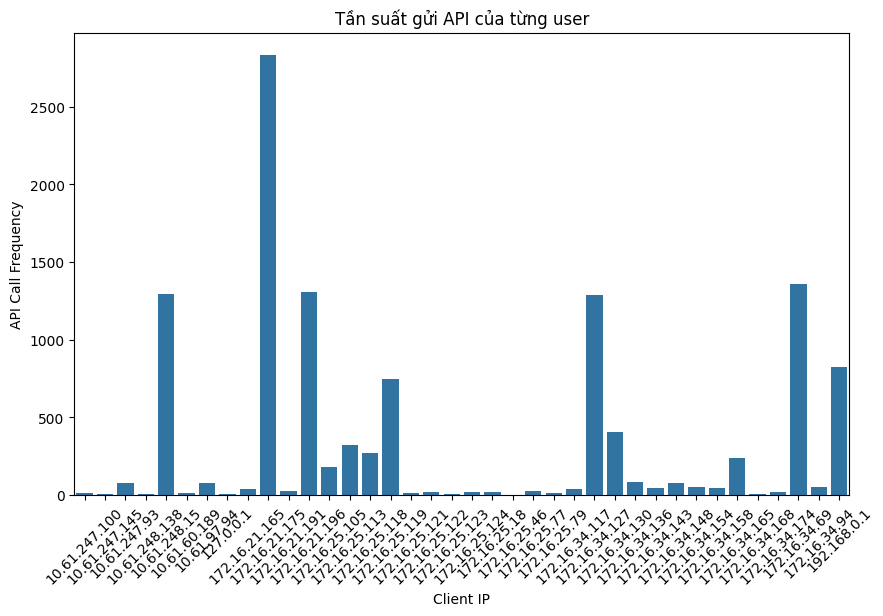

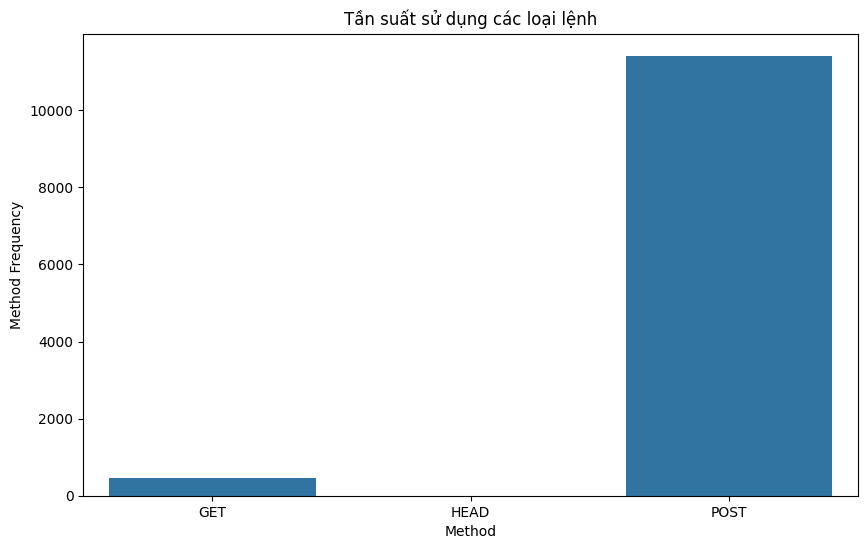

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ biểu đồ tần suất gửi API của từng user
plt.figure(figsize=(10, 6))
sns.barplot(x='Client IP', y='API Call Frequency', data=user_activity)
plt.title('Tần suất gửi API của từng user')
plt.xticks(rotation=45)
plt.show()

# Vẽ biểu đồ loại lệnh được sử dụng
plt.figure(figsize=(10, 6))
sns.barplot(x='Method', y='Method Frequency', data=method_usage)
plt.title('Tần suất sử dụng các loại lệnh')
plt.show()


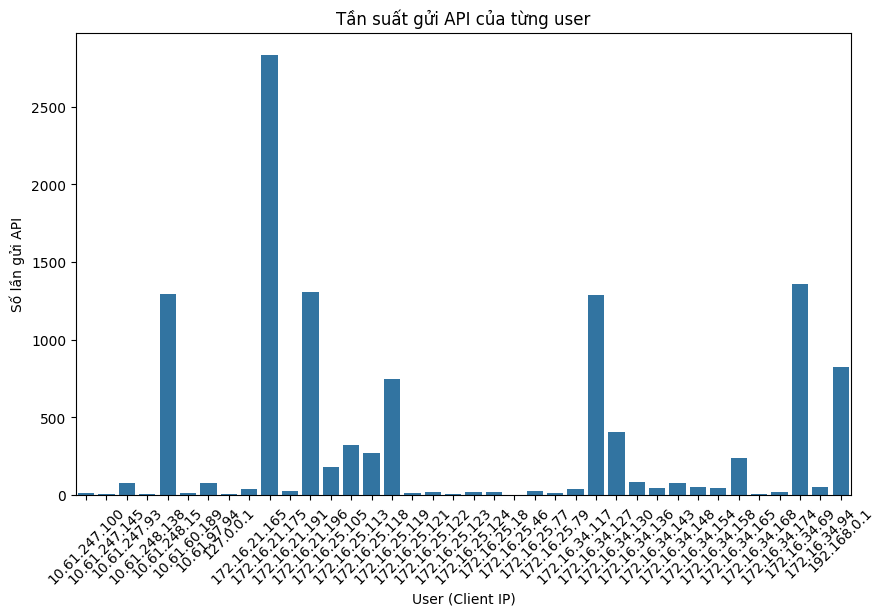

In [35]:
# Thống kê tần suất gửi API của từng user (Client IP)
user_activity = df.groupby('Client IP').size().reset_index(name='API Call Frequency')

# Vẽ biểu đồ tần suất gửi API của từng user
plt.figure(figsize=(10, 6))
sns.barplot(x='Client IP', y='API Call Frequency', data=user_activity)
plt.title('Tần suất gửi API của từng user')
plt.xlabel('User (Client IP)')
plt.ylabel('Số lần gửi API')
plt.xticks(rotation=45)
plt.show()


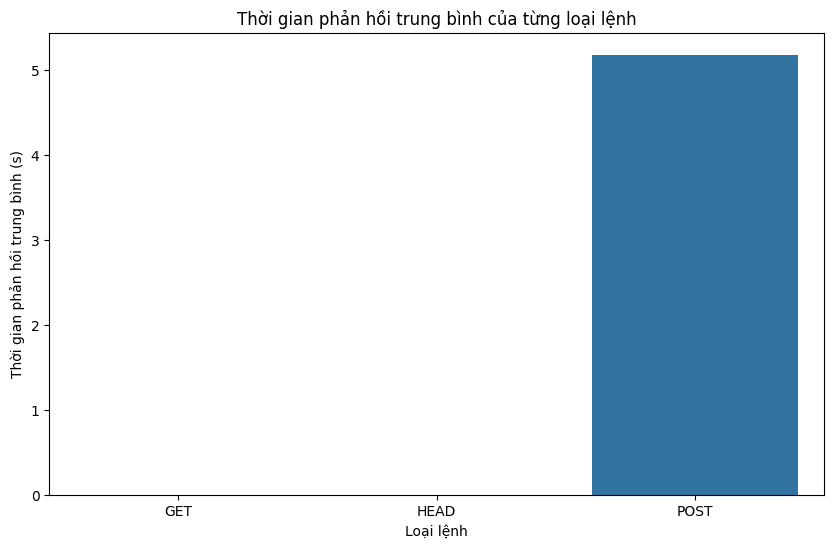

In [36]:
# Tính toán thời gian phản hồi trung bình theo loại lệnh (Method)
method_response_time = df.groupby('Method')['Response Time (s)'].mean().reset_index(name='Avg Response Time (s)')

# Vẽ biểu đồ thời gian phản hồi trung bình theo loại lệnh
plt.figure(figsize=(10, 6))
sns.barplot(x='Method', y='Avg Response Time (s)', data=method_response_time)
plt.title('Thời gian phản hồi trung bình của từng loại lệnh')
plt.xlabel('Loại lệnh')
plt.ylabel('Thời gian phản hồi trung bình (s)')
plt.show()


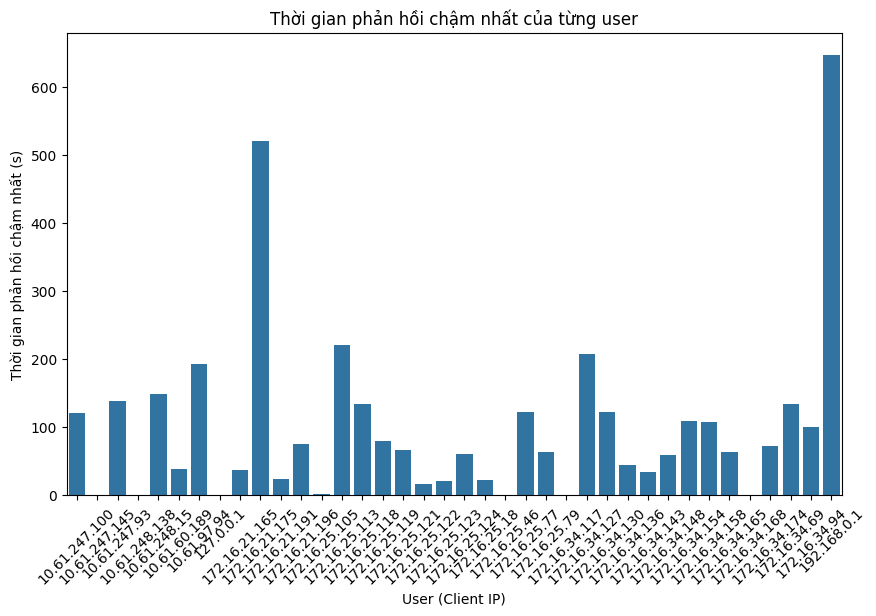

In [37]:
# Tìm ra thời gian phản hồi lâu nhất của từng user (Client IP)
user_slowest_request = df.groupby('Client IP')['Response Time (s)'].max().reset_index(name='Max Response Time (s)')

# Vẽ biểu đồ thời gian phản hồi chậm nhất của từng user
plt.figure(figsize=(10, 6))
sns.barplot(x='Client IP', y='Max Response Time (s)', data=user_slowest_request)
plt.title('Thời gian phản hồi chậm nhất của từng user')
plt.xlabel('User (Client IP)')
plt.ylabel('Thời gian phản hồi chậm nhất (s)')
plt.xticks(rotation=45)
plt.show()
